# Company Employees data

Data Source: https://www.kaggle.com/datasets/abdallahwagih/company-employees

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df_raw = pd.read_excel("data/Employees.xlsx")

In [3]:
df_raw.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [4]:
df_raw.describe()

,No,Start Date,Years,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
count,689.000000,689,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,345.000000,2019-01-25 09:20:06.966618368,1.476052,2068.201742,24818.420900,3.586357,1.609579,0.759071,13.702467
min,1.000000,2016-01-08 00:00:00,0.000000,703.000000,8436.000000,1.000000,0.000000,0.000000,0.000000
25%,173.000000,2018-04-05 00:00:00,1.000000,1436.000000,17232.000000,3.000000,0.000000,0.000000,3.000000
50%,345.000000,2019-04-03 00:00:00,1.000000,2077.000000,24924.000000,3.000000,0.000000,0.000000,7.000000
75%,517.000000,2019-12-22 00:00:00,2.000000,2682.000000,32184.000000,5.000000,3.000000,0.000000,10.000000
max,689.000000,2020-12-29 00:00:00,5.000000,3450.000000,41400.000000,5.000000,6.000000,6.000000,198.000000
std,199.041453,NaN,1.190963,763.289240,9159.470878,1.350125,2.196051,1.647764,25.692049


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

#### Notes
* No null values, data looks clean

In [6]:
df_raw.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

## Data cleaning and standarizing

In [7]:
df = df_raw[['Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours']].copy()
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['gender', 'start_date', 'years', 'department', 'country', 'center',
       'monthly_salary', 'annual_salary', 'job_rate', 'sick_leaves',
       'unpaid_leaves', 'overtime_hours'],
      dtype='object')

In [8]:
cat_cols = ["gender", "department", "country", "center", "job_rate"]
for col in cat_cols:
    if col != "job_rate":
        df[col] = df[col].str.lower().str.replace(" ", "_")
    print(f"{col} -> {len(df[col].unique())} -> {df[col].unique()}")
    print("------------------------------------------------------")

gender -> 2 -> ['male' 'female']
------------------------------------------------------
department -> 20 -> ['quality_control' 'major_mfg_projects' 'manufacturing'
 'product_development' 'sales' 'account_management' 'green_building' 'it'
 'facilities/engineering' 'marketing' 'manufacturing_admin' 'training'
 'quality_assurance' 'professional_training_group'
 'environmental_compliance' 'creative' 'research/development'
 'environmental_health/safety' 'human_resources' 'research_center']
------------------------------------------------------
country -> 5 -> ['egypt' 'saudi_arabia' 'united_arab_emirates' 'syria' 'lebanon']
------------------------------------------------------
center -> 5 -> ['west' 'main' 'north' 'south' 'east']
------------------------------------------------------
job_rate -> 5 -> [3.  1.  2.  5.  4.5]
------------------------------------------------------


In [9]:
df.groupby(["country", "center"])[["country", "center"]].value_counts()

country               center
egypt                 east       28
                      main      131
                      north     125
                      south      33
                      west       62
lebanon               main        5
                      north       3
                      south       2
                      west        1
saudi_arabia          east        6
                      main       32
                      north      23
                      south       9
                      west       20
syria                 east        5
                      main       22
                      north      11
                      south       5
                      west       10
united_arab_emirates  east        8
                      main       61
                      north      45
                      south      16
                      west       26
Name: count, dtype: int64

#### Notes
* The emplopyees are mainly from Northeast Afrika or West Asia
* `center` is local for each country, rather than a world level category, so they are not one to one.

## Data analysis

### Data distribution

/tmp/ipykernel_133599/4138029944.py:5: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


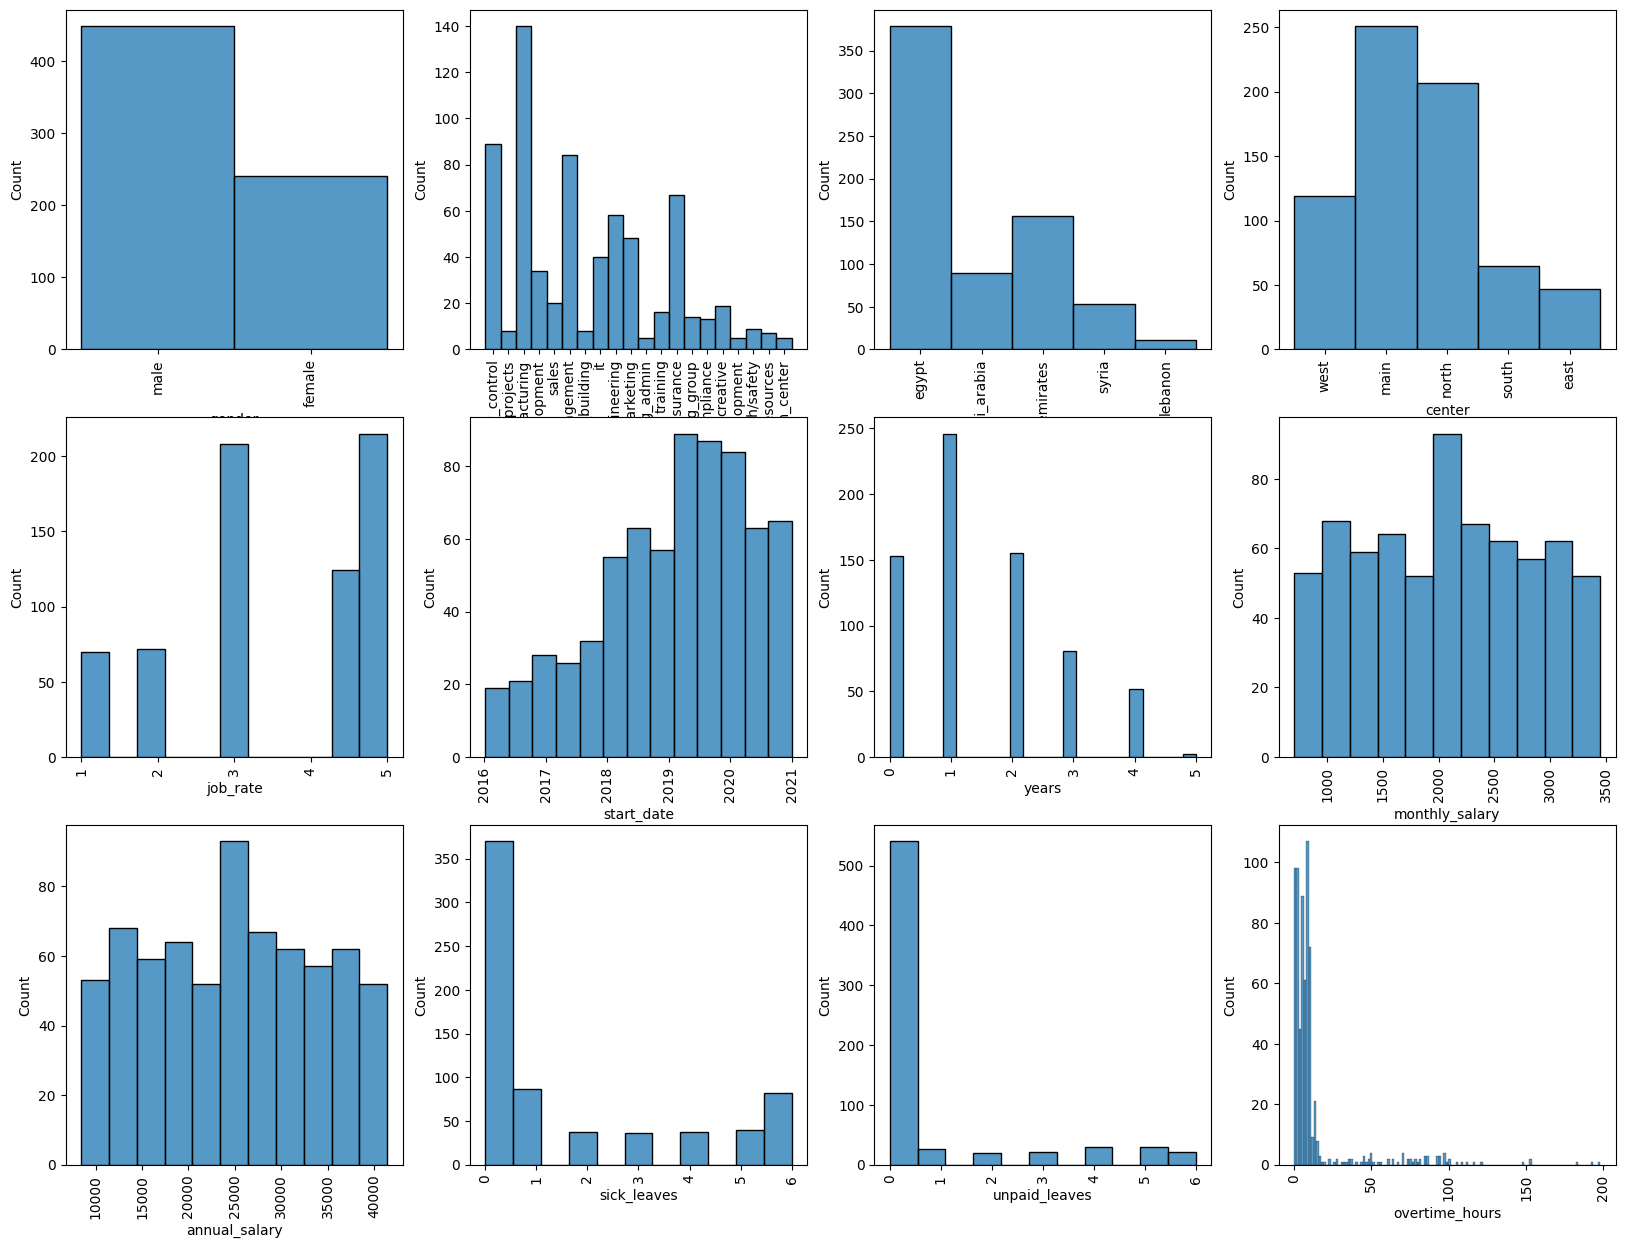

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=4)
fig.set_figheight(15)
fig.set_figwidth(20)

with pd.option_context('mode.use_inf_as_na', True):
#     plt.xticks(rotation=90)
    sns.histplot(df['gender'], ax=axs[0][0])
    axs[0][0].tick_params(axis='x', rotation=90)
    sns.histplot(df['department'], ax=axs[0][1])
    axs[0][1].tick_params(axis='x', rotation=90)
    sns.histplot(df['country'], ax=axs[0][2])
    axs[0][2].tick_params(axis='x', rotation=90)
    sns.histplot(df['center'], ax=axs[0][3])
    axs[0][3].tick_params(axis='x', rotation=90)

    sns.histplot(df['job_rate'], ax=axs[1][0])
    axs[1][0].tick_params(axis='x', rotation=90)
    sns.histplot(df['start_date'], ax=axs[1][1])
    axs[1][1].tick_params(axis='x', rotation=90)
    sns.histplot(df['years'], ax=axs[1][2])
    axs[1][2].tick_params(axis='x', rotation=90)
    sns.histplot(df['monthly_salary'], ax=axs[1][3])
    axs[1][3].tick_params(axis='x', rotation=90)

    sns.histplot(df['annual_salary'], ax=axs[2][0])
    axs[2][0].tick_params(axis='x', rotation=90)
    sns.histplot(df['sick_leaves'], ax=axs[2][1])
    axs[2][1].tick_params(axis='x', rotation=90)
    sns.histplot(df['unpaid_leaves'], ax=axs[2][2])
    axs[2][2].tick_params(axis='x', rotation=90)
    sns.histplot(df['overtime_hours'], ax=axs[2][3])
    axs[2][3].tick_params(axis='x', rotation=90)

plt.show()

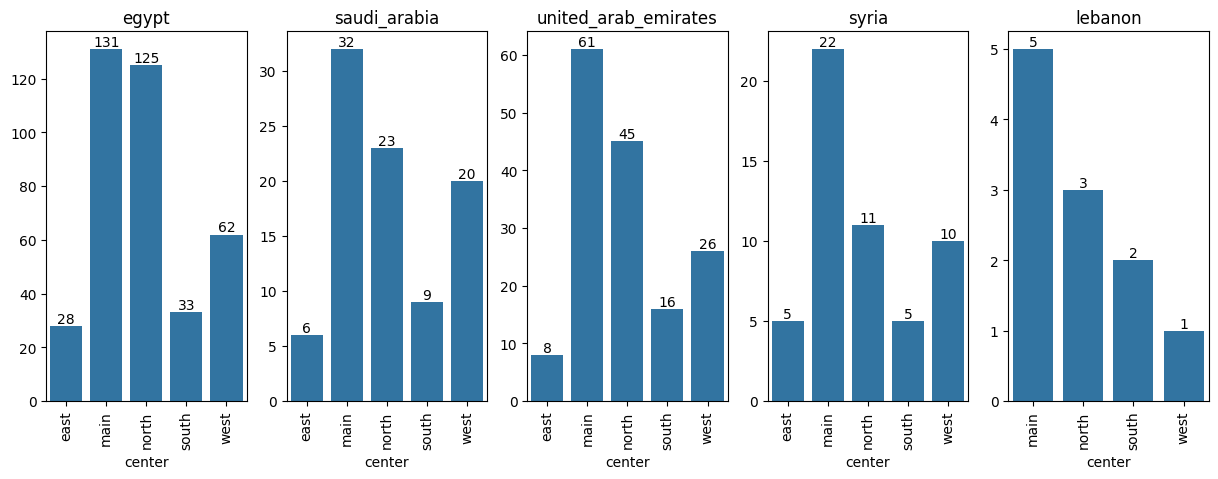

In [11]:
country_wice_center = df.groupby(['country', 'center'])[['country', 'center']].value_counts()
fig, axs = plt.subplots(ncols=5)
fig.set_figwidth(15)
for i in range(5):
    k = df['country'].unique()[i]
    data = country_wice_center[k]
    br = sns.barplot(x=data.index, y=data.values, ax=axs[i])
    br.set_title(k)
    for b in br.containers:
        br.bar_label(b,)
    axs[i].tick_params(axis='x', rotation=90)

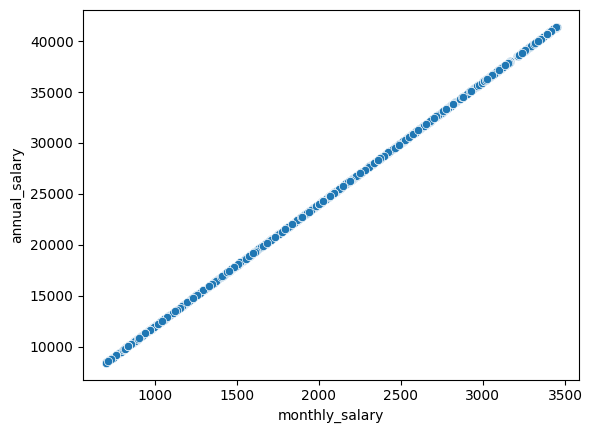

array([12.])

In [12]:
sns.scatterplot(df, x='monthly_salary', y='annual_salary')
plt.show()
(df['annual_salary']/df['monthly_salary']).unique()

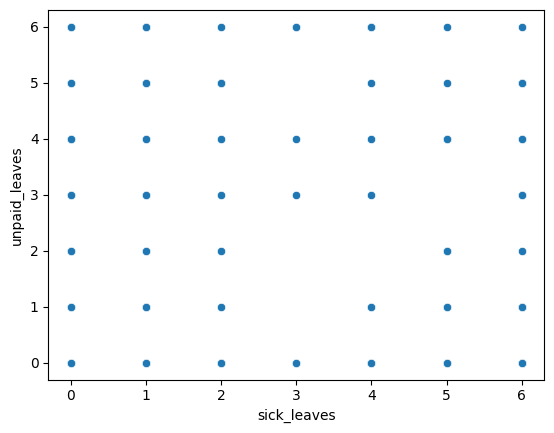

array([ 1,  5,  3,  0,  6,  2,  4, 11,  9, 10,  7,  8, 12])

In [13]:
sns.scatterplot(df, x='sick_leaves', y='unpaid_leaves')
plt.show()
(df['sick_leaves'] + df['unpaid_leaves']).unique()

### Pointers
* Gender
    * Male employees are more than female, almnost double
* Department
    * The most number of employees are in manufacturing and quality_control. This implies that this is a Manufacturing compny
* Country
    * Most of the employees are from Egypt, so its possible that the company headquaters are in Egypt as well
* Center
    * Most of the employees are from main part of countries and then north
    * Lebanon seems have no employees from east part of the country, although it contributes very little to overall workforce
* Job rate
    * Most of the ratings are more than or equal to 3
* Start date
    * Most of the employees joined between 2019 and 2020, so business might be good or company extected to get more work
* Years
    * Most of the emploees are new with 1 or 0 year in company. This would be due to new hires in previos point
* Monthly Salary and Annual Salary
    * The 2 property are linearly related to each other (`Annual Salary = 12 * Monthly Salary`), so we can use one of them and remove other
* Sick leaves and Unpaid leaves
    * These feilds are not related as the last pair
    * A lot of people do not take leaves at all
    * Its to be noted that the max value for each is 6, so company seems to have max 6 leaves allowed of each type
* Overtime hours
    * Most of the people prefer not to over time

### Correlation

In [14]:
df_small = df[['gender', 'start_date', 'years', 'department', 'country', 'center',
       'monthly_salary', 'job_rate', 'sick_leaves',
       'unpaid_leaves', 'overtime_hours']].copy()

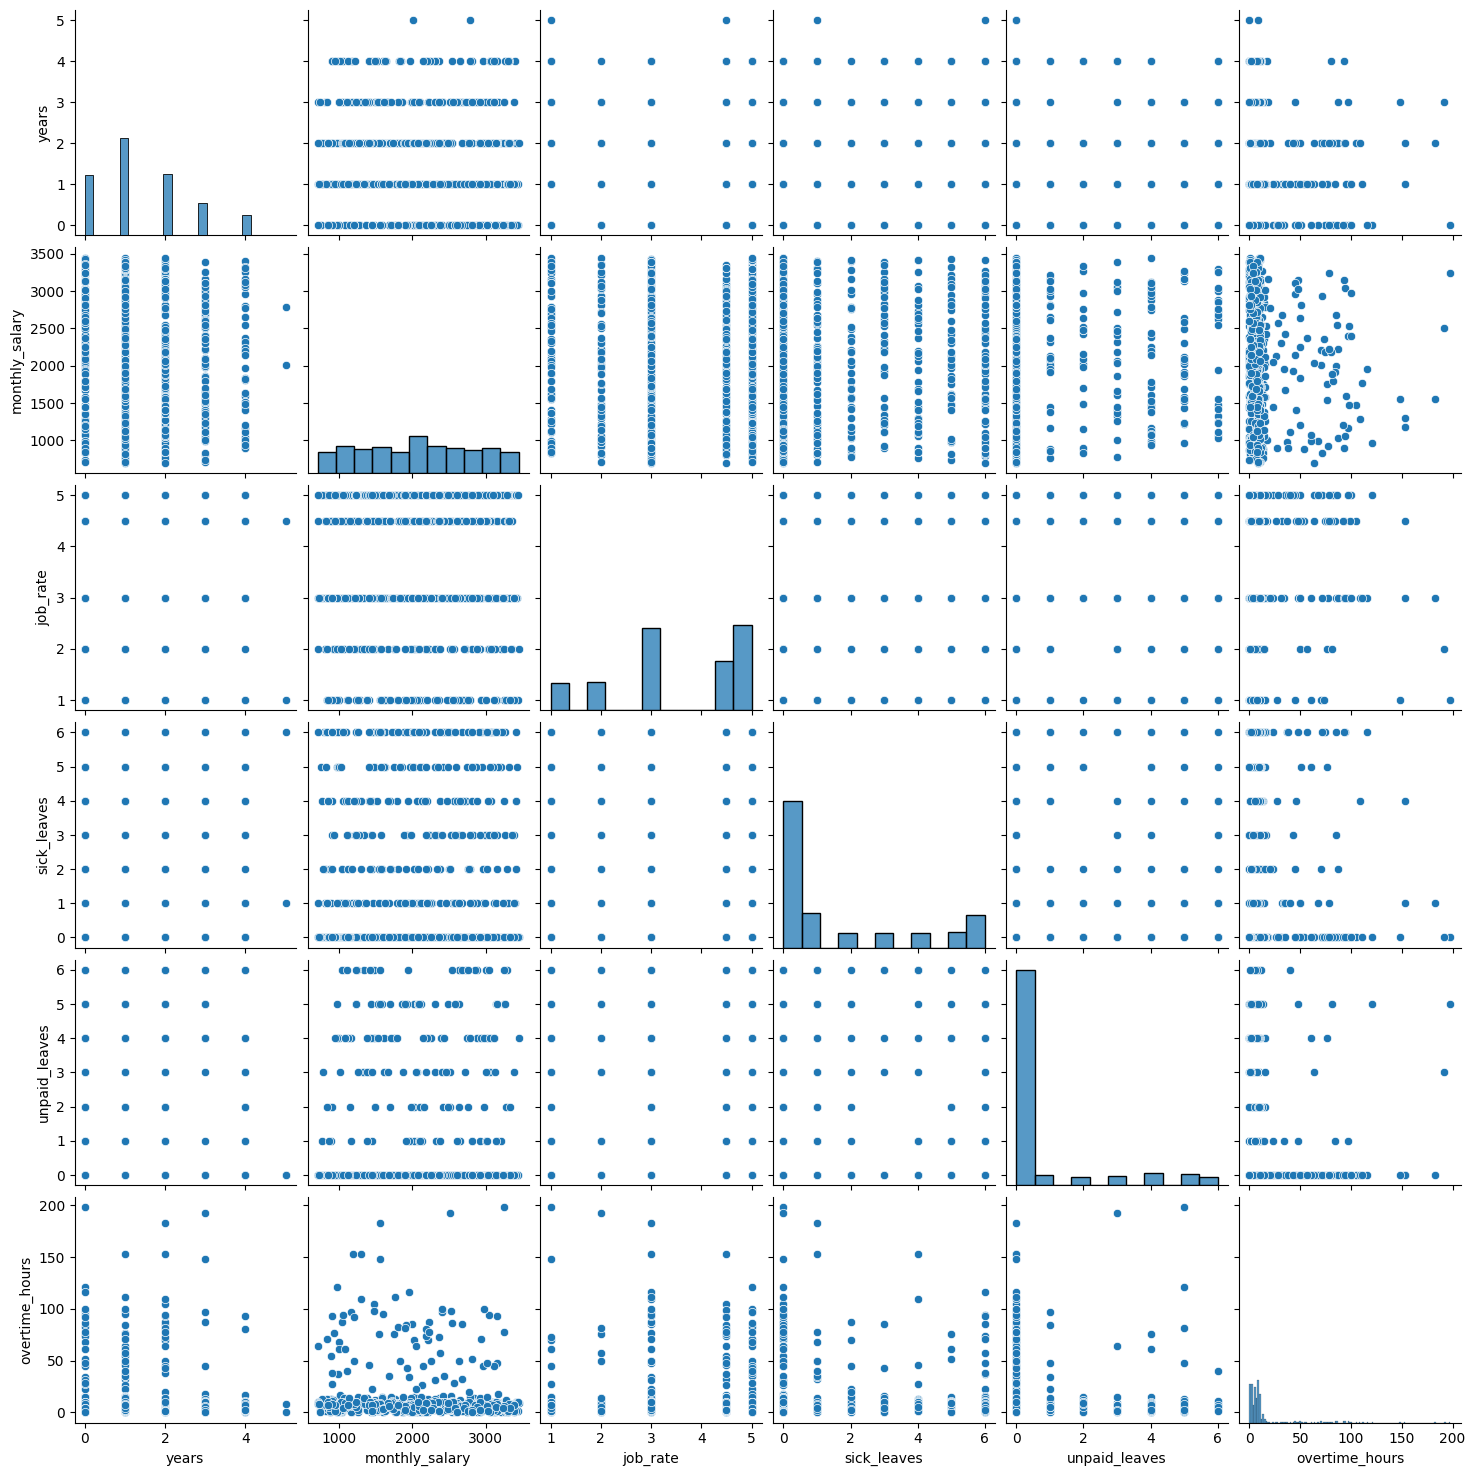

In [15]:
sns.pairplot(df_small)
plt.show()

### Notes
* Employee with more experiance tend to do less over time. They also take less leaves
* Salary seems to have no effect on overtime. Just overtime rate is low in general

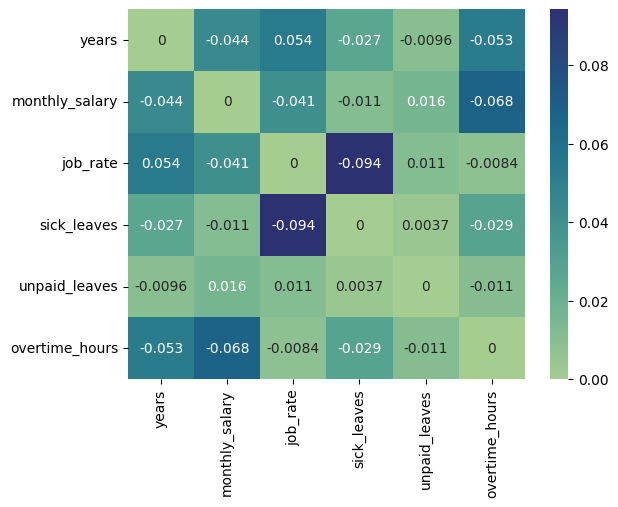

In [16]:
corr = df_small.corr(numeric_only=True)
corr = corr * (np.ones(corr.shape) - np.identity(corr.shape[0]))
corr_abs = corr.abs()
sns.heatmap(corr_abs, cmap='crest', annot=corr)
plt.show()

### Notes
* All numeric fields are weekly correlated to each other
* Sick leaves seems to be the biggest negative factor for employee's Job rating
* As mentined eailier, people who are there for more years in the company are tend to do less overtime. This is reflected here as well
* People with high salary also tend to do less overtime
* People who have been in company for more years tend to get better rating

# Insights

## Gender based

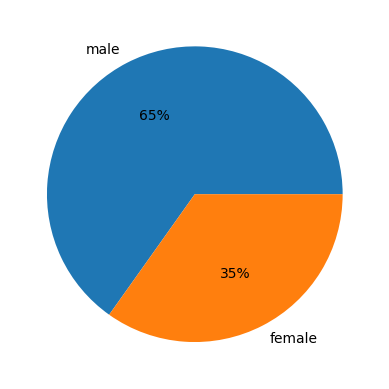

In [17]:
gvc = df["gender"].value_counts()
plt.pie(gvc, labels=gvc.index, autopct='%1.0f%%')
plt.show()

In [18]:
df_small.groupby(by="gender")[["gender", "monthly_salary"]].describe()

monthly_salary                                                          \
                count         mean         std    min     25%     50%     75%   
gender                                                                          
female          240.0  2059.075000  805.041465  705.0  1345.0  2024.0  2727.5   
male            449.0  2073.080178  740.884171  703.0  1459.0  2096.0  2655.0   

                
           max  
gender          
female  3446.0  
male    3450.0

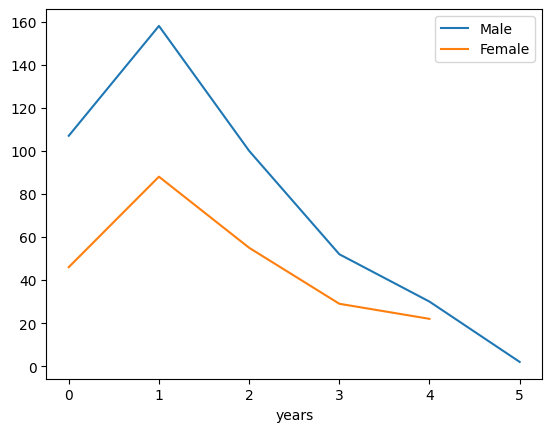

In [19]:
gender_year_count = df_small.groupby(by="gender")[["gender", "years"]].value_counts()
sns.lineplot(x=gender_year_count['male'].index, y=gender_year_count['male'].values, label="Male")
sns.lineplot(x=gender_year_count['female'].index, y=gender_year_count['female'].values, label="Female")
plt.show()

In [20]:
df.groupby("gender")["gender"].value_counts()["female"]

240

In [21]:
def gender_ratio(a: pd.DataFrame):
    d = a.groupby("gender")["gender"].value_counts()
    return (d["female"] if d.keys().__contains__("female") else 0)/d.sum()

df_small.groupby("department")[["gender", "department"]].apply(gender_ratio).sort_values()

department
manufacturing_admin            0.000000
research_center                0.200000
professional_training_group    0.214286
environmental_health/safety    0.222222
training                       0.250000
marketing                      0.270833
human_resources                0.285714
environmental_compliance       0.307692
quality_control                0.314607
manufacturing                  0.321429
facilities/engineering         0.344828
sales                          0.350000
creative                       0.368421
major_mfg_projects             0.375000
research/development           0.400000
it                             0.400000
account_management             0.416667
quality_assurance              0.417910
product_development            0.470588
green_building                 0.500000
dtype: float64

In [22]:
df_small.groupby("country")[["gender", "country"]].apply(gender_ratio).sort_values()

country
syria                   0.264151
united_arab_emirates    0.294872
egypt                   0.369393
saudi_arabia            0.388889
lebanon                 0.454545
dtype: float64

In [23]:
df_small.groupby("job_rate")[["gender", "job_rate"]].apply(gender_ratio).sort_values(), df_small['gender'].value_counts()["female"]/df_small['gender'].value_counts().sum()

(job_rate
 3.0    0.312500
 5.0    0.344186
 1.0    0.357143
 4.5    0.387097
 2.0    0.388889
 dtype: float64,
 0.3483309143686502)

In [24]:
df_small[df["gender"] == "female"]["overtime_hours"].mean(), df_small[df["gender"] == "male"]["overtime_hours"].mean()

(12.325, 14.438752783964365)

### Gender based disparity?
- There are very less number of female employee, just about `1/3rd` of total workforce
- Women seems to have less average pay, but difference is not that big
- Althogh female employees are very less generally, `manufacturing_admin` have none. On other hand `green_building` have equality in gender
- Syria and UAE seems to have least number of women working in the compary
- Lebanon least number of disparity based on gender, although it may be due to its small workforce
- Job rating seems to have no disparity, as it aligns with the percentage of women work force.
- Man seems to opt for more overtime hours

## Demographic

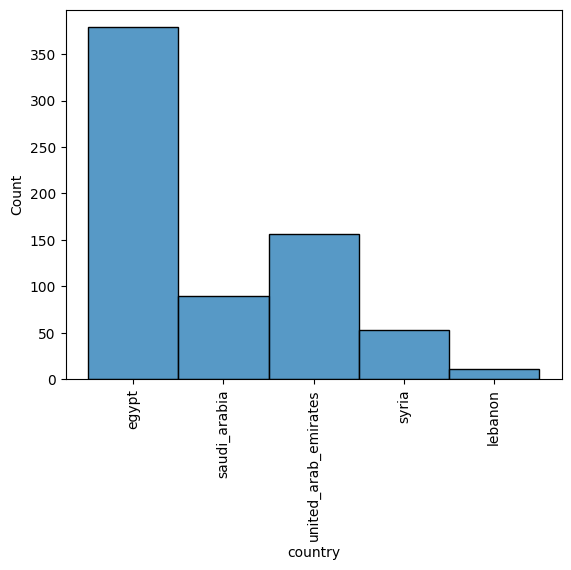

In [25]:
plt.xticks(rotation=90)
sns.histplot(df_small["country"])
plt.show()

In [26]:
df_small.groupby("country")[["country", "monthly_salary"]].describe()

monthly_salary                                          \
                              count         mean         std    min     25%   
country                                                                       
egypt                         379.0  2089.899736  776.603159  703.0  1447.5   
lebanon                        11.0  1989.636364  866.816044  997.0  1345.5   
saudi_arabia                   90.0  2028.288889  758.334563  705.0  1447.0   
syria                          53.0  2015.037736  785.229828  793.0  1254.0   
united_arab_emirates          156.0  2062.115385  725.377276  744.0  1451.0   

                                               
                         50%      75%     max  
country                                        
egypt                 2082.0  2750.50  3450.0  
lebanon               1578.0  2678.00  3337.0  
saudi_arabia          2015.0  2634.25  3443.0  
syria                 2096.0  2611.00  3324.0  
united_arab_emirates  2112.5  2632.25  3404.0

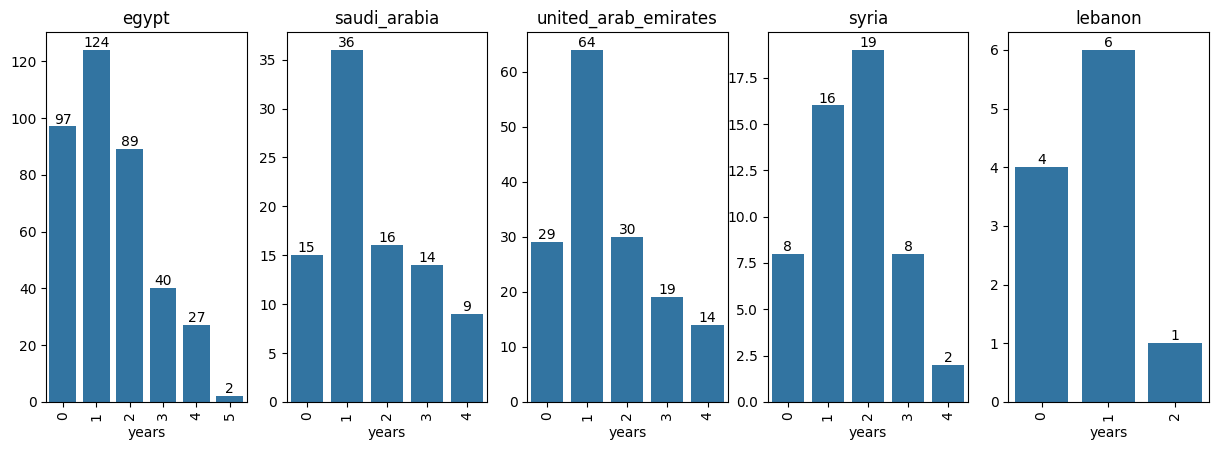

In [27]:
df_small.groupby("country")[["country", "years"]].value_counts()

country_wice_exx = df_small.groupby('country')[['country', 'years']].value_counts()
fig, axs = plt.subplots(ncols=5)
fig.set_figwidth(15)
for i in range(5):
    k = df['country'].unique()[i]
    data = country_wice_exx[k]
    br = sns.barplot(x=data.index, y=data.values, ax=axs[i])
    br.set_title(k)
    for b in br.containers:
        br.bar_label(b,)
    axs[i].tick_params(axis='x', rotation=90)

In [28]:
df_small.groupby("department")[["department", "country"]].value_counts().index.unique().to_list()

[('account_management', 'egypt'),
 ('account_management', 'united_arab_emirates'),
 ('account_management', 'saudi_arabia'),
 ('account_management', 'syria'),
 ('creative', 'egypt'),
 ('creative', 'united_arab_emirates'),
 ('creative', 'syria'),
 ('creative', 'saudi_arabia'),
 ('creative', 'lebanon'),
 ('environmental_compliance', 'egypt'),
 ('environmental_compliance', 'united_arab_emirates'),
 ('environmental_compliance', 'syria'),
 ('environmental_health/safety', 'egypt'),
 ('environmental_health/safety', 'united_arab_emirates'),
 ('facilities/engineering', 'egypt'),
 ('facilities/engineering', 'united_arab_emirates'),
 ('facilities/engineering', 'saudi_arabia'),
 ('facilities/engineering', 'syria'),
 ('green_building', 'united_arab_emirates'),
 ('green_building', 'egypt'),
 ('green_building', 'saudi_arabia'),
 ('green_building', 'syria'),
 ('human_resources', 'united_arab_emirates'),
 ('human_resources', 'syria'),
 ('human_resources', 'lebanon'),
 ('human_resources', 'egypt'),
 ('it

In [29]:
df_small.groupby("country")[["country", "job_rate"]].describe()

job_rate                                             
                        count      mean       std  min  25%  50%  75%  max
country                                                                   
egypt                   379.0  3.547493  1.356588  1.0  3.0  3.0  5.0  5.0
lebanon                  11.0  3.272727  1.329730  1.0  2.5  3.0  4.5  5.0
saudi_arabia             90.0  3.783333  1.332502  1.0  3.0  4.5  5.0  5.0
syria                    53.0  3.481132  1.285878  1.0  3.0  3.0  5.0  5.0
united_arab_emirates    156.0  3.625000  1.369748  1.0  3.0  4.5  5.0  5.0

In [30]:
df_small.groupby("country")[["country", "overtime_hours"]].describe()

overtime_hours                                        \
                              count       mean        std  min   25%  50%   
country                                                                     
egypt                         379.0  14.939314  26.167026  0.0  3.00  7.0   
lebanon                        11.0  15.545455  22.553774  0.0  2.00  7.0   
saudi_arabia                   90.0  19.244444  36.857549  0.0  3.25  8.0   
syria                          53.0   9.358491  18.774056  0.0  2.00  5.0   
united_arab_emirates          156.0   8.846154  16.643183  0.0  3.00  7.0   

                                   
                       75%    max  
country                            
egypt                 10.0  183.0  
lebanon               12.5   68.0  
saudi_arabia          10.0  198.0  
syria                  8.0  100.0  
united_arab_emirates   9.0  153.0

#### Demography
- Egypt have most number of employees
- Lebanon seems to have lowest mean monthly salary
- Lebanon has least number of seniors employess
- Research/Development department is only in Egypt
- Lebenon has alot of departments missing
- United Arab Emirates has Major Mfg Projects department missing
- Egypt and Syria is only country which have all the departments

## Across department

In [31]:
df_small["department"].value_counts()

department
manufacturing                  140
quality_control                 89
account_management              84
quality_assurance               67
facilities/engineering          58
marketing                       48
it                              40
product_development             34
sales                           20
creative                        19
training                        16
professional_training_group     14
environmental_compliance        13
environmental_health/safety      9
major_mfg_projects               8
green_building                   8
human_resources                  7
manufacturing_admin              5
research/development             5
research_center                  5
Name: count, dtype: int64

In [32]:
df_small.groupby("department")[["monthly_salary", "department"]].describe().sort_values(by=("monthly_salary", "mean"), ascending=False)

monthly_salary                                   \
                                     count         mean         std     min   
department                                                                    
human_resources                        7.0  2555.857143  457.867677  1881.0   
environmental_compliance              13.0  2508.153846  639.371155  1161.0   
training                              16.0  2361.750000  808.849595   812.0   
facilities/engineering                58.0  2285.275862  788.418532   822.0   
major_mfg_projects                     8.0  2242.375000  759.572424   997.0   
it                                    40.0  2114.525000  756.902832   711.0   
research/development                   5.0  2098.600000  854.708020   833.0   
quality_assurance                     67.0  2083.925373  792.073350   840.0   
green_building                         8.0  2082.875000  881.251130   969.0   
marketing                             48.0  2061.125000  848.821727   707.0   
quality_control                       89.0  2053.955056  749.088430   723.0   
professional_training_group           14.0  2040.428571  793.097308   830.0   
creative                              19.0  2011.315789  597.040577   943.0   
manufacturing                        140.0  2004.635714  735.409779   719.0   
environmental_health/safety            9.0  2000.444444  562.626011  1430.0   
product_development                   34.0  1964.705882  821.324633   744.0   
sales                                 20.0  1956.450000  737.816799   808.0   
account_management                    84.0  1937.166667  765.148979   703.0   
manufacturing_admin                    5.0  1921.000000  528.453877  1290.0   
research_center                        5.0  1887.000000  968.271140  1096.0   

                                                               
                                 25%     50%      75%     max  
department                                                     
human_resources              2299.50  2428.0  2945.00  3093.0  
environmental_compliance     2169.00  2539.0  3084.00  3354.0  
training                     1878.75  2386.5  3115.50  3334.0  
facilities/engineering       1619.25  2445.0  2921.25  3404.0  
major_mfg_projects           1940.75  2435.0  2532.25  3446.0  
it                           1654.25  2019.5  2813.00  3258.0  
research/development         1856.00  2132.0  2542.00  3130.0  
quality_assurance            1303.50  2115.0  2681.00  3420.0  
green_building               1392.75  1988.0  2869.50  3275.0  
marketing                    1361.25  1983.5  2928.75  3410.0  
quality_control              1436.00  2136.0  2581.00  3443.0  
professional_training_group  1325.25  2032.0  2614.75  3282.0  
creative                     1610.00  2188.0  2339.50  3388.0  
manufacturing                1438.75  1971.0  2642.00  3411.0  
environmental_health/safety  1521.00  1971.0  2191.00  3120.0  
product_development          1095.50  2058.0  2475.25  3337.0  
sales                        1465.25  1973.5  2383.75  3311.0  
account_management           1227.50  2017.5  2571.50  3450.0  
manufacturing_admin          1405.00  2207.0  2342.00  2361.0  
research_center              1226.00  1230.0  2815.00  3068.0

In [33]:
df_small.groupby("department")[["years", "department"]].describe().sort_values(by=("years", "mean"), ascending=False)

years                                            \
                             count      mean       std  min   25%  50%   75%   
department                                                                     
environmental_health/safety    9.0  2.555556  1.424001  0.0  2.00  3.0  4.00   
sales                         20.0  1.900000  1.372665  0.0  1.00  1.0  3.00   
manufacturing_admin            5.0  1.800000  1.483240  0.0  1.00  2.0  2.00   
creative                      19.0  1.789474  1.182227  0.0  1.00  2.0  2.50   
professional_training_group   14.0  1.714286  1.325987  0.0  1.00  1.0  2.75   
research_center                5.0  1.600000  0.894427  1.0  1.00  1.0  2.00   
human_resources                7.0  1.571429  0.975900  0.0  1.00  2.0  2.00   
product_development           34.0  1.500000  1.212311  0.0  1.00  1.0  2.00   
manufacturing                140.0  1.492857  1.128419  0.0  1.00  1.0  2.00   
marketing                     48.0  1.479167  1.184826  0.0  1.00  1.0  2.00   
quality_assurance             67.0  1.417910  1.327441  0.0  0.00  1.0  2.00   
account_management            84.0  1.416667  1.142902  0.0  1.00  1.0  2.00   
facilities/engineering        58.0  1.413793  1.185208  0.0  1.00  1.0  2.00   
it                            40.0  1.400000  1.296939  0.0  0.75  1.0  2.00   
quality_control               89.0  1.382022  1.112998  0.0  1.00  1.0  2.00   
green_building                 8.0  1.375000  1.302470  0.0  0.75  1.0  2.00   
environmental_compliance      13.0  1.307692  1.377474  0.0  0.00  1.0  2.00   
major_mfg_projects             8.0  1.250000  1.035098  0.0  0.75  1.0  2.00   
training                      16.0  1.250000  1.064581  0.0  1.00  1.0  1.25   
research/development           5.0  1.200000  1.303840  0.0  0.00  1.0  2.00   

                                  
                             max  
department                        
environmental_health/safety  4.0  
sales                        4.0  
manufacturing_admin          4.0  
creative                     4.0  
professional_training_group  4.0  
research_center              3.0  
human_resources              3.0  
product_development          4.0  
manufacturing                4.0  
marketing                    4.0  
quality_assurance            5.0  
account_management           4.0  
facilities/engineering       4.0  
it                           5.0  
quality_control              4.0  
green_building               4.0  
environmental_compliance     4.0  
major_mfg_projects           3.0  
training                     4.0  
research/development         3.0

### Department wise analysis
- Manufacturing is the most important department in the company, Quality Control and Account management being next in the list
- Research center seems to have lowest average income. They are also least number of employees
- Haman resources and Environment Compliance have highest average income
- environmental_health/safety have more percentage of seniority than other department.